In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import linalg

import matplotlib.pyplot as plt

In [ ]:
tickers = yf.Tickers('msft aapl goog')

df_msft = tickers.tickers['MSFT'].history(period="1d", interval="1m")["Close"]
df_aapl = tickers.tickers['AAPL'].history(period="1d", interval="1m")["Close"]
df_goog = tickers.tickers['GOOG'].history(period="1d", interval="1m")["Close"]

In [3]:
df_test = tickers.tickers['MSFT'].history(period="1d", interval="1m")

In [4]:
print(df_test)

                                 Open        High         Low       Close  \
Datetime                                                                    
2024-11-08 09:30:00-05:00  425.395996  426.000000  424.450012  424.570007   
2024-11-08 09:31:00-05:00  424.570007  425.029999  424.380005  424.989197   
2024-11-08 09:32:00-05:00  425.024994  425.880005  424.924988  425.820007   
2024-11-08 09:33:00-05:00  426.000000  426.500000  425.809998  426.230011   
2024-11-08 09:34:00-05:00  426.190002  426.190002  425.130005  425.368805   
...                               ...         ...         ...         ...   
2024-11-08 15:55:00-05:00  421.859985  422.250000  421.779999  422.162201   
2024-11-08 15:56:00-05:00  422.160004  422.500000  422.160004  422.489990   
2024-11-08 15:57:00-05:00  422.459991  422.790009  422.410004  422.758392   
2024-11-08 15:58:00-05:00  422.734985  422.829987  422.510101  422.709991   
2024-11-08 15:59:00-05:00  422.700012  422.929993  422.540009  422.929993   

In [5]:
# Creating a dictionary by passing Series objects as values
frame = {'MSFT': df_msft} #,
        #'GOOG': df_goog,
        #'AAPL': df_aapl}
 
# Creating DataFrame by passing Dictionary
df = pd.DataFrame(frame)

In [6]:
display(df)

,MSFT
Datetime,
2024-11-08 09:30:00-05:00,424.570007
2024-11-08 09:31:00-05:00,424.989197
2024-11-08 09:32:00-05:00,425.820007
2024-11-08 09:33:00-05:00,426.230011
2024-11-08 09:34:00-05:00,425.368805
...,...
2024-11-08 15:55:00-05:00,422.162201
2024-11-08 15:56:00-05:00,422.489990
2024-11-08 15:57:00-05:00,422.758392


In [7]:
lrets = np.log(df/df.shift(1)).dropna()

In [8]:
Omega = (lrets
         .rolling(30)
         .cov()
         .dropna())

In [9]:
display(Omega)

,,MSFT
Datetime,,
2024-11-08 10:02:00-05:00,MSFT,7.761333e-07
2024-11-08 10:03:00-05:00,MSFT,7.917497e-07
2024-11-08 10:04:00-05:00,MSFT,7.557828e-07
2024-11-08 10:05:00-05:00,MSFT,7.198986e-07
2024-11-08 10:06:00-05:00,MSFT,5.867878e-07
...,...,...
2024-11-08 15:55:00-05:00,MSFT,1.108460e-07
2024-11-08 15:56:00-05:00,MSFT,1.358499e-07
2024-11-08 15:57:00-05:00,MSFT,1.313210e-07


In [10]:
dates = lrets.index
dates = dates[30:]

covdata = dict(zip(dates, [Omega.loc[date].values for date in dates]))

In [11]:
marketBM = dict(zip(dates, [np.matmul(np.linalg.inv(linalg.sqrtm(Omega.loc[date].values)),lrets.loc[date].values) for date in dates]))

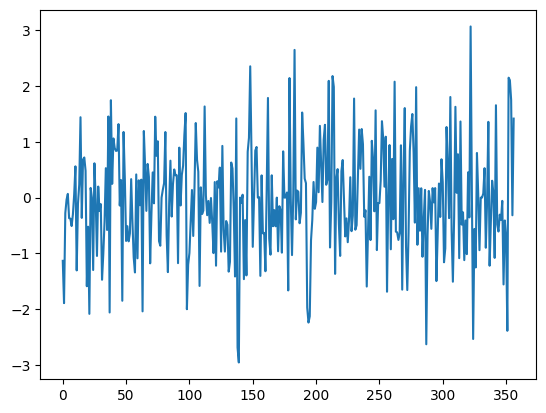

0.9833970860994037
-0.05192588158540645


In [12]:
plt.plot([marketBM[date][0] for date in dates])
plt.show()
print(np.std(np.array([marketBM[date][0] for date in dates])))
print(np.mean(np.array([marketBM[date][0] for date in dates])))

In [13]:
K=1
BMmarketpath = 1/250*np.ones((len(dates),K))
mean=np.zeros(K)
for k in range(K):
    mean[k] = np.mean([marketBM[l][k] for l in dates])

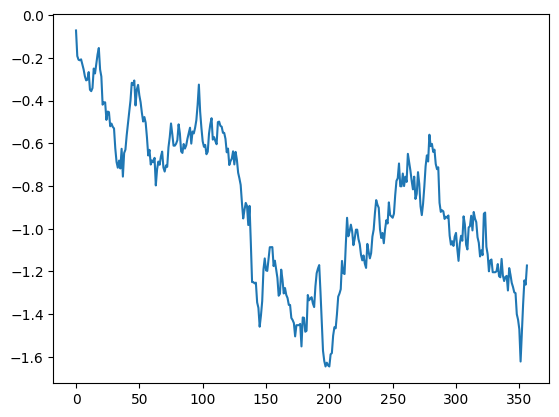

In [14]:
for i in range(K):
    BMmarketpath[:,i] = np.cumsum([np.sqrt(1/250)*(marketBM[date][i]-0.*mean[i])
                                                   for date in dates])
#BMmarketpath[:,K]= np.cumsum(BMmarketpath[:,K])
plt.plot(BMmarketpath)
plt.show()

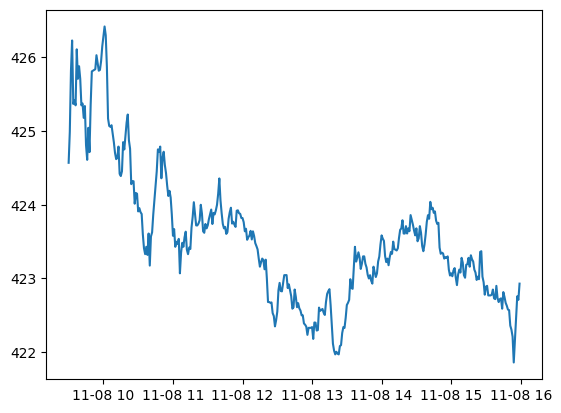

In [15]:
plt.figure()
plt.plot(df_msft)
#plt.plot(df_aapl)
#plt.plot(df_goog)
plt.show()

For example, the New York Stock Exchange is, as of 2020, open from 9:30 AM Eastern Time to 4:00 PM Eastern Time.

In [16]:
print(df_msft.shape)

(388,)


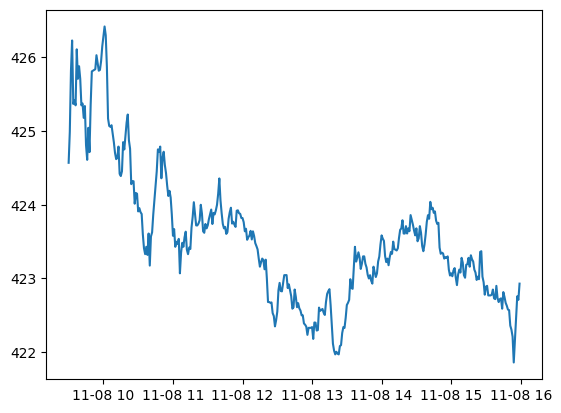

In [17]:
plt.figure()
plt.plot(df_msft[:700])
plt.show()

In [18]:
Kmarket = 1
Ymarket = np.zeros((len(dates),Kmarket))
for i in range(Kmarket):
    Ymarket[:,i]=np.cumsum([lrets.loc[date].values[i] for date in dates])
Ymarket = np.exp(Ymarket)

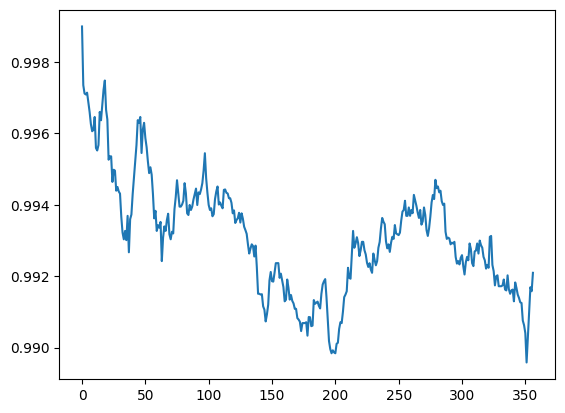

In [19]:
plt.plot(Ymarket)
plt.show()

In [20]:
print(Ymarket.shape)

(357, 1)


In [21]:
d=K
M=70

def nilpotent(M):
    B = np.zeros((M,M))
    for i in range(2,M):
        B[i,i-1]=1.0
    return B

def canonical(i,M):
    e = np.zeros((M,1))
    e[i,0]=1.0
    return e

def randomAbeta(d,M):
    A = []
    beta = []
    for i in range(d):
        #B = 0.1*np.identity(M)+np.random.normal(0.0,.5,size=(M,M))
        B = np.random.normal(0.0,0.02,size=(M,M)) # 0.1 for scen-gen, 1.5 for SABR
        #B = np.random.permutation(B)
        #B = np.identity(M)
        #B = sp.linalg.sqrtm(np.matmul(B,np.transpose(B)))
        A = A + [B]
        beta = beta + [0.*canonical(i,M)+np.random.normal(0.0,0.03,size=(M,1))]
    return [A,beta]

Abeta = randomAbeta(d,M)
A = Abeta[0]
beta = Abeta[1]

def sigmoid(x):
    return np.tanh(x)

def reservoirfield(state,increment):
    value = np.zeros((M,1))
    for i in range(d):
        value = value + sigmoid(np.matmul(A[i],state) + beta[i])*increment[i]
    return value

In [22]:
def vectorfield2d(state,increment):
    return np.array([(2.0*np.sqrt(state[1]**2))**0.7+np.sin(state[1]),1.0*state[1]+np.cos(state[1])])*increment[0]+np.array([(2.0*np.sqrt(state[1]**2))**0.7,0.0*state[1]])*increment[1]

class SDE:
    def __init__(self,timehorizon,initialvalue,dimension,dimensionBM,dimensionR,vectorfield,timesteps):
        self.timehorizon = timehorizon
        self.initialvalue = initialvalue # np array
        self.dimension = dimension
        self.dimensionBM = dimensionBM
        self.dimensionR = dimensionR
        self.vectorfield = vectorfield
        self.timesteps = timesteps

    def path(self):
        BMpath = [np.zeros(self.dimensionBM)] # We store it in a list to have the whole BM path
        SDEpath = [np.array([1.0, self.initialvalue])]
        for i in range(self.timesteps):
            helper = np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [np.exp(-1.0*self.timehorizon/self.timesteps)*(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))] # represents the path of X_t using the SDE (and hence the vf)
        return [BMpath, SDEpath]

    def anypath(self):
        BMpath = [np.zeros(self.dimensionBM)]
        SDEpath = [np.array([1.0, self.initialvalue])]#[np.ones((self.dimension,1))*self.initialvalue]

        for i in range(self.timesteps):
            helper = np.cos(BMpath[-1]*50)*self.timehorizon/self.timesteps#np.random.normal(0,np.sqrt(self.timehorizon/self.timesteps),self.dimensionBM)
            BMpath = BMpath + [BMpath[-1]+helper]
            SDEpath = SDEpath + [np.exp(-0.0*self.timehorizon/self.timesteps)*(SDEpath[-1]+self.vectorfield(SDEpath[-1],helper))]

        return [BMpath, SDEpath]

    def reservoir(self,BMpath,scaling,k):
        reservoirpath = [canonical(k,self.dimensionR)*self.initialvalue] # e_k*X_0
        for i in range(self.timesteps):
            increment = scaling*(BMpath[i+1]-BMpath[i])
            reservoirpath = reservoirpath + [np.exp(-1.0*self.timehorizon/self.timesteps)*(reservoirpath[-1]+reservoirfield(reservoirpath[-1],increment))]
        return reservoirpath

In [23]:
#Ymarketdiff = np.diff(Ymarket,axis=0)
#Ymarkettrain = np.concatenate((Ymarket[:200],Ymarketdiff[:200:1]),axis=0)
Ymarkettrain = Ymarket[:300]
np.shape(Ymarkettrain)

(300, 1)

In [24]:
BMmarketpathlist = [BMmarketpath[i,:] for i in range(len(dates))]
#BMmarketpathlist = [Ymarket[i,:K] for i in range(len(dates))]
Reservoir = SDE(1,1.5,2,K,M,vectorfield2d,len(dates)-1)
X=Reservoir.reservoir(BMmarketpathlist,0.5,0)
np.shape(X)
Xdata = np.squeeze(X)
Reservoir1 = SDE(1,0.0,2,K,M,vectorfield2d,len(dates)-1)
X1=Reservoir1.reservoir(BMmarketpathlist,0.4,0)
np.shape(X1)
Xdata1=np.squeeze(X1)
Reservoir2 = SDE(1,-1.5,2,K,M,vectorfield2d,len(dates)-1)
X2=Reservoir2.reservoir(BMmarketpathlist,0.3,0)
np.shape(X2)
Xdata2 = np.squeeze(X2)
Xdata = np.concatenate((Xdata,Xdata1,Xdata2),axis=1)
#Xdatadiff = np.diff(Xdata,axis=0)
#Xtrain=np.concatenate((Xdata[:200],Xdatadiff[:200:1]),axis=0)
Xtrain = Xdata[:300]
np.shape(Xtrain)

(300, 210)

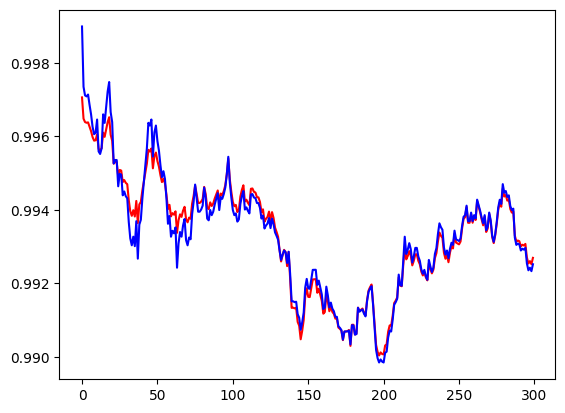

array([[ 2.13537131e-03,  1.19041778e-03,  1.36470304e-03,
         3.16343878e-03, -4.29924687e-04, -3.54816334e-03,
        -4.07421796e-03, -8.87268615e-04, -4.52396877e-03,
         1.67051093e-03,  3.67200912e-04, -9.95229017e-04,
         9.31605583e-04,  3.87431866e-03, -1.15574733e-03,
        -1.14879545e-03, -2.82646190e-03,  7.83969352e-04,
         2.24202762e-03,  1.27039052e-03, -7.91592372e-04,
         7.70847364e-05,  5.62285594e-04,  7.87513063e-04,
        -2.29998211e-03, -2.58417646e-03, -2.25245582e-03,
         4.47866186e-04,  2.17055888e-03, -2.80038581e-03,
        -4.05381090e-03,  4.43237519e-04,  1.62374088e-03,
        -6.70707591e-04, -1.59448457e-03, -1.27340977e-03,
         1.57403364e-03, -5.84216858e-04, -1.95552136e-03,
         1.03059229e-03,  6.61203964e-04,  3.07261682e-04,
         1.92978712e-03, -9.98981770e-04, -2.41268581e-03,
        -8.04083225e-04,  2.86003274e-04, -2.04581264e-03,
        -5.99770915e-04,  1.68124132e-03,  2.63178573e-0

In [25]:
from sklearn import linear_model
lm = linear_model.Ridge(alpha=0.05)#LinearRegression()
model = lm.fit(Xtrain,Ymarkettrain)
plt.plot(model.predict(Xtrain),'r')
plt.plot(Ymarkettrain,'b')
plt.show()
model.score(Xtrain,Ymarkettrain)
model.coef_

TypeError: 'Axes' object is not subscriptable

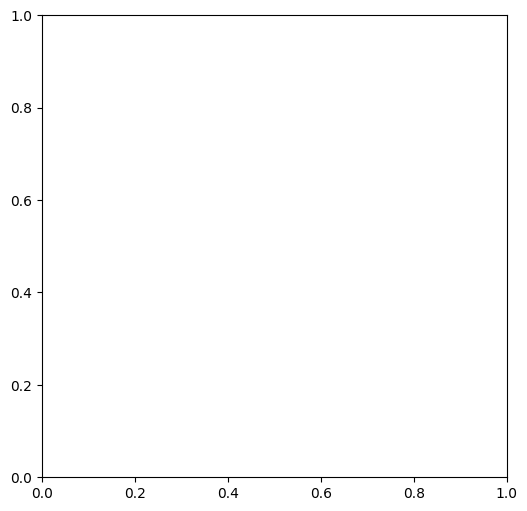

In [ ]:
f,p=plt.subplots(Kmarket,1,figsize=(6,6),sharey=False)

for i in range(Kmarket):
    p[i].plot(model.predict(Xdata[301:])[:,i],'b')
    p[i].plot(Ymarket[301:][:,i],'g')
plt.show()

Refine these inputs to have more data